In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Description

Show_id: Unique ID for every Movie / Tv Show

Type: Identifier - A Movie or TV Show

Title: Title of the Movie / Tv Show

Director: Director of the Movie

Cast: Actors involved in the movie/show

Country: Country where the movie/show was produced

Date_added: Date it was added on Netflix

Release_year: Actual Release year of the movie/show

Rating: TV Rating of the movie/show

Duration: Total Duration - in minutes or number of seasons

Listed_in: Genre

Description: The summary description

# EDA

In [3]:
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# cast , director, country, listed_In

In [5]:
data.shape

(8807, 12)

## 1. Checking the duplicate values in our data 

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 2. checking the null values in our data 

In [8]:
# checking the null values in our data
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# number of unique values in our data
data.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
# by the observation of the data we find we need to doing some unnesting 
# techniques 
# column name
# 1. director
# 2.cast
# 3.country
# 4.listed_in 

In [11]:
# Unnesting on the director column 
col1 = data['director'].apply(lambda x: str(x).split(',')).to_list()
d1 = pd.DataFrame(col1, index = data['title'])
d1 = d1.stack()
d1 = pd.DataFrame(d1.reset_index())
d1.rename(columns={0:'Directors'}, inplace=True)
d1.drop(['level_1'], axis=1, inplace = True)
d1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [12]:
# unnesting on cast column names
col2 = data['cast'].apply(lambda x: str(x).split(',')).to_list()
d2 = pd.DataFrame(col2, index =data['title'])
d2 = d2.stack()
d2 = pd.DataFrame(d2.reset_index())
d2.rename(columns= {0: 'Actors'},inplace = True)
d2.drop(['level_1'], axis= 1, inplace = True)
d2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [13]:
# unnesting on the country column
col3 = data['country'].apply(lambda x : str(x).split(',')).to_list()
d3 = pd.DataFrame(col3 , index = data['title'])
d3 = d3.stack()
d3 = pd.DataFrame(d3.reset_index())
d3.rename(columns={0: 'country'}, inplace = True)
d3.drop(['level_1'], axis = 1,inplace= True)
d3.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [14]:
# unnesting on the listed_in column
col4 = data['listed_in'].apply(lambda x: str(x).split(',')).to_list()
d4 = pd.DataFrame(col4, index = data['title'])
d4 = d4.stack()
d4 = pd.DataFrame(d4.reset_index())
d4.rename(columns= {0: 'Genre'}, inplace= True)
d4.drop(['level_1'], axis = 1, inplace = True)
d4.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [15]:
d4.shape

(19323, 2)

In [16]:
# merging the unnested director column with the actors 
d5 = d1.merge(d2, how = 'inner', on = 'title')
d5.head()

,title,Directors,Actors
0,Dick Johnson Is Dead,Kirsten Johnson,nan
1,Blood & Water,nan,Ama Qamata
2,Blood & Water,nan,Khosi Ngema
3,Blood & Water,nan,Gail Mabalane
4,Blood & Water,nan,Thabang Molaba


In [17]:
# merging the unnested genre witn d5 (diretor and actor)
d6 = d5.merge(d4, how= 'inner', on = 'title')
d6.head()

,title,Directors,Actors,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries
1,Blood & Water,nan,Ama Qamata,International TV Shows
2,Blood & Water,nan,Ama Qamata,TV Dramas
3,Blood & Water,nan,Ama Qamata,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,International TV Shows


In [18]:
# merging the unnested country with d6 (director, actor, genre)
d7 = d6.merge(d3, how = 'inner', on = 'title')
d7.head()

,title,Directors,Actors,Genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


In [19]:
d7.isnull().sum()

title        0
Directors    0
Actors       0
Genre        0
country      0
dtype: int64

In [20]:
d7.loc[d7['Directors']=='nan']

,title,Directors,Actors,Genre,country
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa
5,Blood & Water,nan,Khosi Ngema,TV Dramas,South Africa
...,...,...,...,...,...
203142,Zindagi Gulzar Hai,nan,Hina Khawaja Bayat,Romantic TV Shows,Pakistan
203143,Zindagi Gulzar Hai,nan,Hina Khawaja Bayat,TV Dramas,Pakistan
203210,Zombie Dumb,nan,nan,Kids' TV,nan
203211,Zombie Dumb,nan,nan,Korean TV Shows,nan


Note : - in our dataset 'nan' will give us a string dtype which means it's string not a nan value ,
np.nan give us null value so our isnull() not captured nan values becaues dtype is str 

In [21]:
d7['Directors'].replace('nan', 'unknown director', inplace= True)
d7['Actors'].replace('nan', 'unknown Actors', inplace= True)
# d7['Genre'].replace('nan', 'Genre', inplace= True)
d7['country'].replace('nan',np.nan, inplace= True)

In [22]:
d7.isnull().sum()

title            0
Directors        0
Actors           0
Genre            0
country      12177
dtype: int64

In [23]:
# merging data with the other columns 
df_new = d7.merge(data[['show_id','type', 'title', 'date_added', 'release_year','rating', 'duration']], 
                  on = 'title' , 
                  how = 'left')

In [24]:
# description column is not helping us to give analysis so i didn't take it 
df_new.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,unknown director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,unknown director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,unknown director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,unknown director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [25]:
df_new.shape

(204645, 11)

In [26]:
df_new.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
country         12497
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [27]:
df_new['rating'].value_counts()

rating
TV-MA       73915
TV-14       45277
R           27120
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

we can see duration column has 3 null values and corresponding the rating column has 3 values which is minitue 

In [28]:
df_new.loc[df_new['duration'].isnull(),'duration']

129248    NaN
134314    NaN
134448    NaN
Name: duration, dtype: object

In [29]:
df_new.loc[df_new['duration'].isnull(),'duration'].fillna(df_new['rating'])

129248    74 min
134314    84 min
134448    66 min
Name: duration, dtype: object

In [30]:
# filling the null values of duration column corresponding the rating column
df_new.loc[df_new['duration'].isnull(),'duration'] = df_new.loc[df_new['duration'].isnull(),'duration'].fillna(df_new['rating'])

In [31]:
df_new.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
country         12497
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

Now we can see we just filled the null values in duration column

In [32]:
df_new['rating'].str.contains('min').sum()

3

changing the 3 values which are not appropriate to rating column so converting into non rating (NR) values 

In [33]:
df_new.loc[df_new['rating'].str.contains('min',na=False),'rating']

129248    74 min
134314    84 min
134448    66 min
Name: rating, dtype: object

In [34]:
df_new.loc[df_new['rating'].str.contains('min',na=False),'rating'] = 'NR'

In [35]:
df_new['rating'].fillna('NR', inplace=True)

In [36]:
df_new.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
country         12497
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [37]:
# checking the null value is the date column
df_new.loc[df_new['date_added'].isnull()].head(10)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
139520,A Young Doctor's Notebook and Other Stories,unknown director,Daniel Radcliffe,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
139521,A Young Doctor's Notebook and Other Stories,unknown director,Daniel Radcliffe,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
139522,A Young Doctor's Notebook and Other Stories,unknown director,Daniel Radcliffe,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
139523,A Young Doctor's Notebook and Other Stories,unknown director,Jon Hamm,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
139524,A Young Doctor's Notebook and Other Stories,unknown director,Jon Hamm,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
139525,A Young Doctor's Notebook and Other Stories,unknown director,Jon Hamm,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
139526,A Young Doctor's Notebook and Other Stories,unknown director,Adam Godley,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
139527,A Young Doctor's Notebook and Other Stories,unknown director,Adam Godley,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
139528,A Young Doctor's Notebook and Other Stories,unknown director,Adam Godley,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
139529,A Young Doctor's Notebook and Other Stories,unknown director,Christopher Godwin,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [38]:
modes = df_new.groupby('release_year')['date_added'].apply(lambda x: x.mode().iloc[0])

In [39]:
df_new.groupby('release_year')['date_added'].value_counts()

release_year  date_added       
1925          December 30, 2018     1
1942          March 31, 2017        6
1943          March 31, 2017        5
1944          March 31, 2017       24
1945          March 31, 2017       12
                                   ..
2021          May 11, 2021          1
              May 30, 2021          1
              January 11, 2021      1
              March 24, 2021        1
              January 12, 2021      1
Name: count, Length: 4783, dtype: int64

In [40]:
modes

release_year
1925    December 30, 2018
1942       March 31, 2017
1943       March 31, 2017
1944       March 31, 2017
1945       March 31, 2017
              ...        
2017    September 1, 2017
2018     October 10, 2018
2019       March 29, 2019
2020          May 8, 2020
2021       August 6, 2021
Name: date_added, Length: 74, dtype: object

In [41]:
# Fill null values based on the modes
df_new['date_added'] = df_new.apply(lambda row: modes[row['release_year']] if pd.isna(row['date_added']) else row['date_added'], axis=1)

In [42]:
# checking null values 
df_new.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
country         12497
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

In [43]:
# checking null values in the director 
df_new.loc[df_new['country'].isnull()].head(10)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
58,Ganglands,Julien Leclercq,Sami Bouajila,Crime TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
59,Ganglands,Julien Leclercq,Sami Bouajila,International TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
60,Ganglands,Julien Leclercq,Sami Bouajila,TV Action & Adventure,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
61,Ganglands,Julien Leclercq,Tracy Gotoas,Crime TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
62,Ganglands,Julien Leclercq,Tracy Gotoas,International TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
63,Ganglands,Julien Leclercq,Tracy Gotoas,TV Action & Adventure,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
64,Ganglands,Julien Leclercq,Samuel Jouy,Crime TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
65,Ganglands,Julien Leclercq,Samuel Jouy,International TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
66,Ganglands,Julien Leclercq,Samuel Jouy,TV Action & Adventure,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
67,Ganglands,Julien Leclercq,Nabiha Akkari,Crime TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season


In [44]:
# checking null values in country columns where  director are unique 
df_new.loc[df_new['country'].isnull()]['Directors'].nunique()

378

In [45]:
df_new.loc[df_new['country'].isnull()]['Directors'].unique()

array(['Julien Leclercq', 'unknown director', 'Mike Flanagan',
       'Robert Cullen', ' JosÃ© Luis Ucha', 'Kongkiat Komesiri',
       'Bruno Garotti', 'Pedro de Echave GarcÃ\xada',
       ' Pablo AzorÃ\xadn Williams', 'Adam Salky', 'Olivier Megaton',
       'K.S. Ravikumar', 'Alex Woo', ' Stanley Moore', 'Rajiv Menon',
       'Ashwiny Iyer Tiwari', ' Abhishek Chaubey', ' Saket Chaudhary',
       'Daniel Sandu', 'CÃ©dric Jimenez', 'Tyler Greco', 'Bunmi Ajakaiye',
       'David Yarovesky', 'Hanns-Bruno KammertÃ¶ns', ' Vanessa NÃ¶cker',
       ' Michael Wech', 'David A. Vargas', 'Ben Simms', 'Prakash Satam',
       'Delhiprasad Deenadayalan', 'Tomer Eshed', 'Thomas Sieben',
       'Marcus Clarke', 'Alexis AlmstrÃ¶m', 'Jason Hehir', 'Yemi Amodu',
       'Luis Alfaro', ' Javier GÃ³mez Santander', 'Sara Colangelo',
       'Stephen Herek', 'JP Habac', 'Gilles Paquet-Brenner',
       'Scott Pleydell-Pearce', 'Gerhard Mostert', 'Peter Segal',
       'Chapman Way', ' Maclain Way', 'Mark Waters'

In [46]:
for i in df_new[df_new['country'].isnull()]['Directors'].unique():
  if i in df_new[~df_new['country'].isnull()]['Directors'].unique():
    imp = df_new[df_new['Directors'] == i]['country'].mode().values[0]
    df_new.loc[df_new['Directors'] == i, 'country'] = df_new.loc[df_new['Directors'] == i, 'country'].fillna(imp)


In [47]:
df_new.isnull().sum()

title              0
Directors          0
Actors             0
Genre              0
country         4673
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

In [48]:
for i in df_new[df_new['country'].isnull()]['Actors'].unique():
  if i in df_new[~df_new['country'].isnull()]['Actors'].unique():
    imp = df_new[df_new['Actors'] == i]['country'].mode().values[0]
    df_new.loc[df_new['Actors'] == i, 'country'] = df_new.loc[df_new['Actors'] == i, 'country'].fillna(imp)


In [49]:
df_new.isnull().sum()

title              0
Directors          0
Actors             0
Genre              0
country         2455
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

In [50]:
df_new['country'].fillna('Unknown Country', inplace=True)

In [51]:
df_new.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [52]:
df_new['duration'].value_counts()

duration
1 Season     35635
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: count, Length: 220, dtype: int64

In [53]:
df_new['duration']= df_new['duration'].str.replace(" min","")

In [54]:
df_new.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,unknown director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,unknown director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,unknown director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,unknown director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [55]:
df_new['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [56]:
df_new['new_duration'] = df_new['duration'].copy()

In [57]:
x = df_new.copy()

In [58]:
x.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,new_duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,unknown director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,unknown director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,unknown director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,unknown director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons


We are only conatin minitues in new_duration where all the season will become 0

In [59]:
x.loc[x['new_duration'].str.contains('Season'), 'new_duration'] = 0 

In [60]:
# change the type of this new column
x['new_duration'] = x['new_duration'].astype(int)

In [61]:
x.head(2)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,new_duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,unknown director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [62]:
# finding the statical information about this column 
x['new_duration'].describe()

count    204645.000000
mean         77.502270
std          52.435773
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: new_duration, dtype: float64

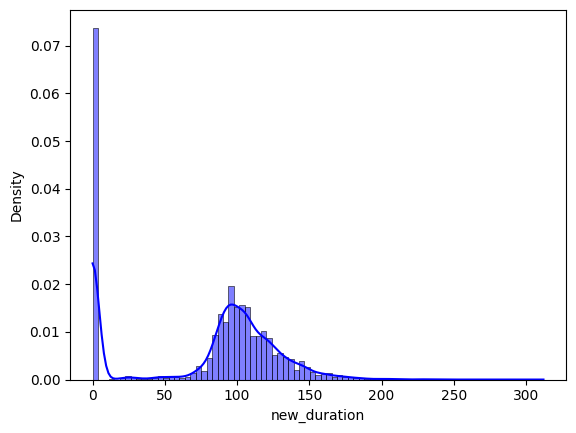

In [63]:
sns.histplot(x['new_duration'], kde=True, stat="density", color='blue')
plt.show()

in Duration column we can easily see the different different timeduration in minute now after getting the statical information about the new_duration column we can easilyt see the max duration in minitue is 312 and minmum duration in miniute is 50 , so i just created a range so can easily categories 

In [64]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
x['new_duration'] = pd.cut(x['new_duration'], bins=bins1, labels = labels1 )

In [65]:
x['new_duration']

0          80-100
1              <1
2              <1
3              <1
4              <1
           ...   
204640    100-120
204641    100-120
204642    100-120
204643    100-120
204644    100-120
Name: new_duration, Length: 204645, dtype: category
Categories (8, object): ['<1' < '1-50' < '50-80' < '80-100' < '100-120' < '120-150' < '150-200' < '200-315']

We can easily see we just created 8 categories in our duration column if we look up in the duration column we can easily see the <1 is actually season so

In [66]:
x.loc[~x['duration'].str.contains('Season'),'duration'] = x.loc[~x['duration'].str.contains('Season'),'new_duration']

In [67]:
x['duration'].value_counts()

duration
80-100        52992
100-120       48724
1 Season      35635
120-150       28671
2 Seasons      9559
50-80          7701
150-200        6737
3 Seasons      5084
1-50           2548
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: count, dtype: int64

In [68]:
x.drop(columns=['new_duration'], inplace=True)

In [69]:
x.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,unknown director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,unknown director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,unknown director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,unknown director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [70]:
x[['date_added']]

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
...,...
204640,"March 2, 2019"
204641,"March 2, 2019"
204642,"March 2, 2019"
204643,"March 2, 2019"


In [71]:
x['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [72]:
x['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [73]:
x['modified_date'] = x['date_added'].str.strip()
x['modified_date'] = pd.to_datetime(x['modified_date'] )

In [74]:
# just checkpoint
y = x.copy()

In [75]:
# Use .dt.isocalendar() to get year, week number, and weekday
calender_data = y['modified_date'].dt.isocalendar()

In [76]:
y['month'] = y['modified_date'].dt.month

In [77]:
y['week'] = calender_data['week']

In [78]:
y['year'] = calender_data['year']

In [79]:
# Map month names to quarters using the month_to_quarter dictionary
month_to_quarter = {
    1: 'Q1',
    2: 'Q1',
    3: 'Q1',
    4: 'Q2',
    5: 'Q2',
    6: 'Q2',
    7: 'Q3',
    8: 'Q3',
    9: 'Q3',
    10: 'Q4',
    11: 'Q4',
    12: 'Q4'
}


In [80]:
y['quarter'] = y['month'].map(month_to_quarter)

In [81]:
y.head(2)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,modified_date,month,week,year,quarter
0,Dick Johnson Is Dead,Kirsten Johnson,unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021,Q3
1,Blood & Water,unknown director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021,Q3


title has some value like value is blood & water (2002) then if we wanted to desireable output is like this blood & water

In [82]:
# presence of brackets and content between brackets is removed
y['title'] = y['title'].str.replace(r"\(.*\)","")

In [83]:
y['title'] 

0         Dick Johnson Is Dead
1                Blood & Water
2                Blood & Water
3                Blood & Water
4                Blood & Water
                  ...         
204640                  Zubaan
204641                  Zubaan
204642                  Zubaan
204643                  Zubaan
204644                  Zubaan
Name: title, Length: 204645, dtype: object

We issued some whitespace problems in our dataset so solving all the whitesapce problems  in our object column


In [84]:
y.head(1)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,modified_date,month,week,year,quarter
0,Dick Johnson Is Dead,Kirsten Johnson,unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021,Q3


In [85]:
# y.select_dtypes(include=['object']).columns

In [86]:
object_columns_list = ['title', 'Directors', 'Actors', 'Genre', 'country', 'show_id', 'type','date_added', 'rating', 'duration', 'quarter']

In [87]:
for i in object_columns_list:
    y[i] = y[i].str.strip()

# Analysis 

In [88]:
df = y.copy() 

In [89]:
# find of distinct title on the basis of genre
df.groupby('Genre').agg({'title':'nunique'}).sort_values('title', ascending = False).reset_index()

,Genre,title
0,International Movies,2752
1,Dramas,2425
2,Comedies,1673
3,International TV Shows,1350
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,762
7,Independent Movies,755
8,Children & Family Movies,641
9,Romantic Movies,616


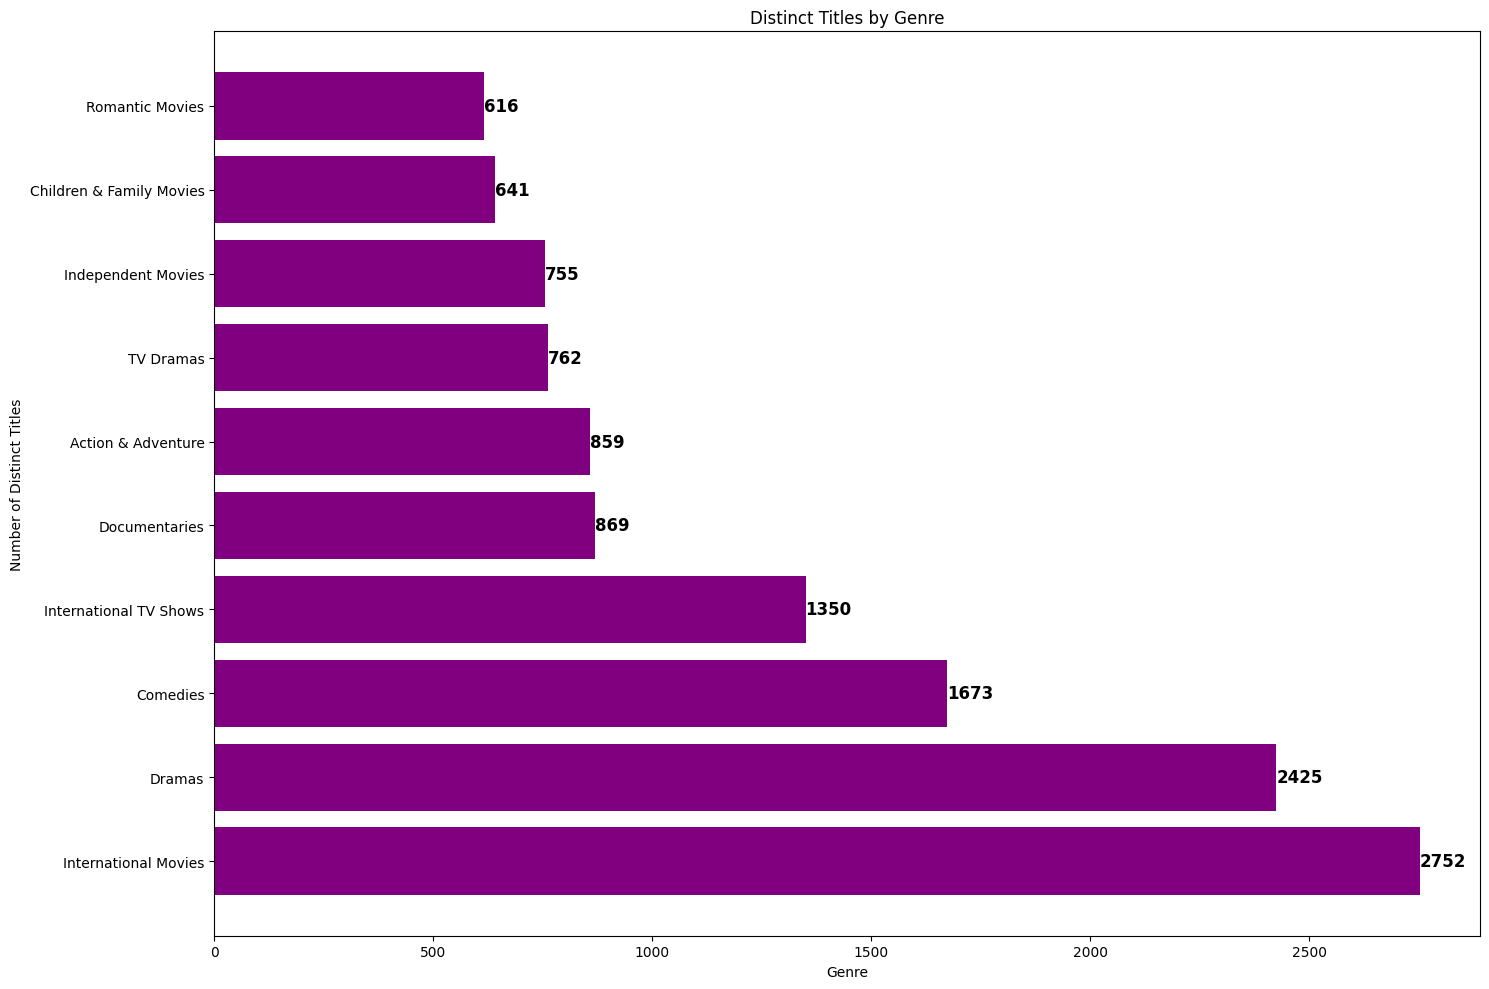

In [90]:
# plot the top  10 genere 
df1 = df.groupby('Genre').agg({'title':'nunique'}).sort_values('title', ascending = False).reset_index().head(10)
plt.figure(figsize=(15, 10))
plt.barh(df1['Genre'], df1['title'], color='purple')
# plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Distinct Titles')
plt.title('Distinct Titles by Genre')

# Add values to the bars
for index, value in enumerate(df1['title']):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


We can see international movies , drama , comedian movies are most popular genre

In [91]:
# Find the type of content values 
df.groupby('type').agg({'title':'nunique'})

,title
type,
Movie,6129
TV Show,2675


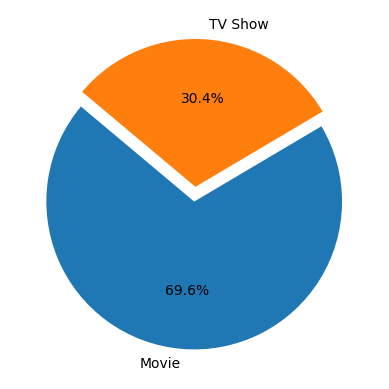

In [92]:
df1 = df.groupby('type').agg({'title':'nunique'}).reset_index()
plt.pie(df1['title'], explode=(0.05, 0.05), labels = df1['type'], autopct='%.1f%%', startangle=140)
plt.show()


our content ratio is 70 : 30 

In [93]:
# Finding the frequency of movies per country
df.groupby('country').agg({'title': 'nunique'}).sort_values(by='title', ascending=False)

,title
country,
United States,4247
India,1130
United Kingdom,829
Canada,459
France,412
...,...
Jamaica,1
Slovakia,1
Somalia,1


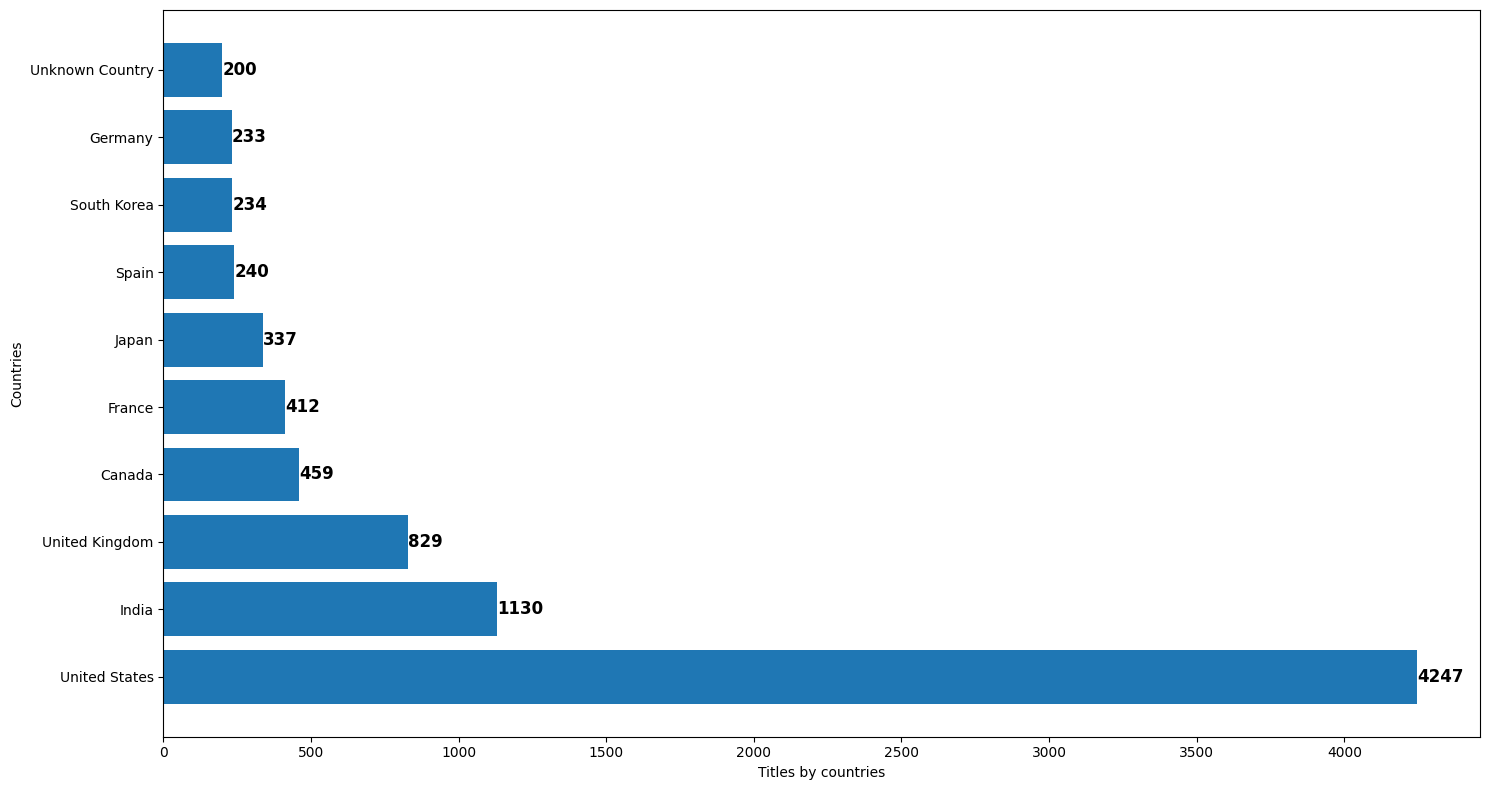

In [94]:
df1 = df.groupby('country').agg({'title': 'nunique'}).sort_values(by='title', ascending=False).reset_index().head(10)
plt.figure(figsize=(15,8))
plt.barh(df1['country'], df1['title'])
plt.xlabel('Titles by countries')
plt.ylabel('Countries')

for index, value in enumerate(df1['title']):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

In [95]:
# Finding the frequency of movies per country
df.groupby('rating').agg({'title': 'nunique'}).sort_values(by='title', ascending=False)

,title
rating,
TV-MA,3207
TV-14,2158
TV-PG,863
R,798
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


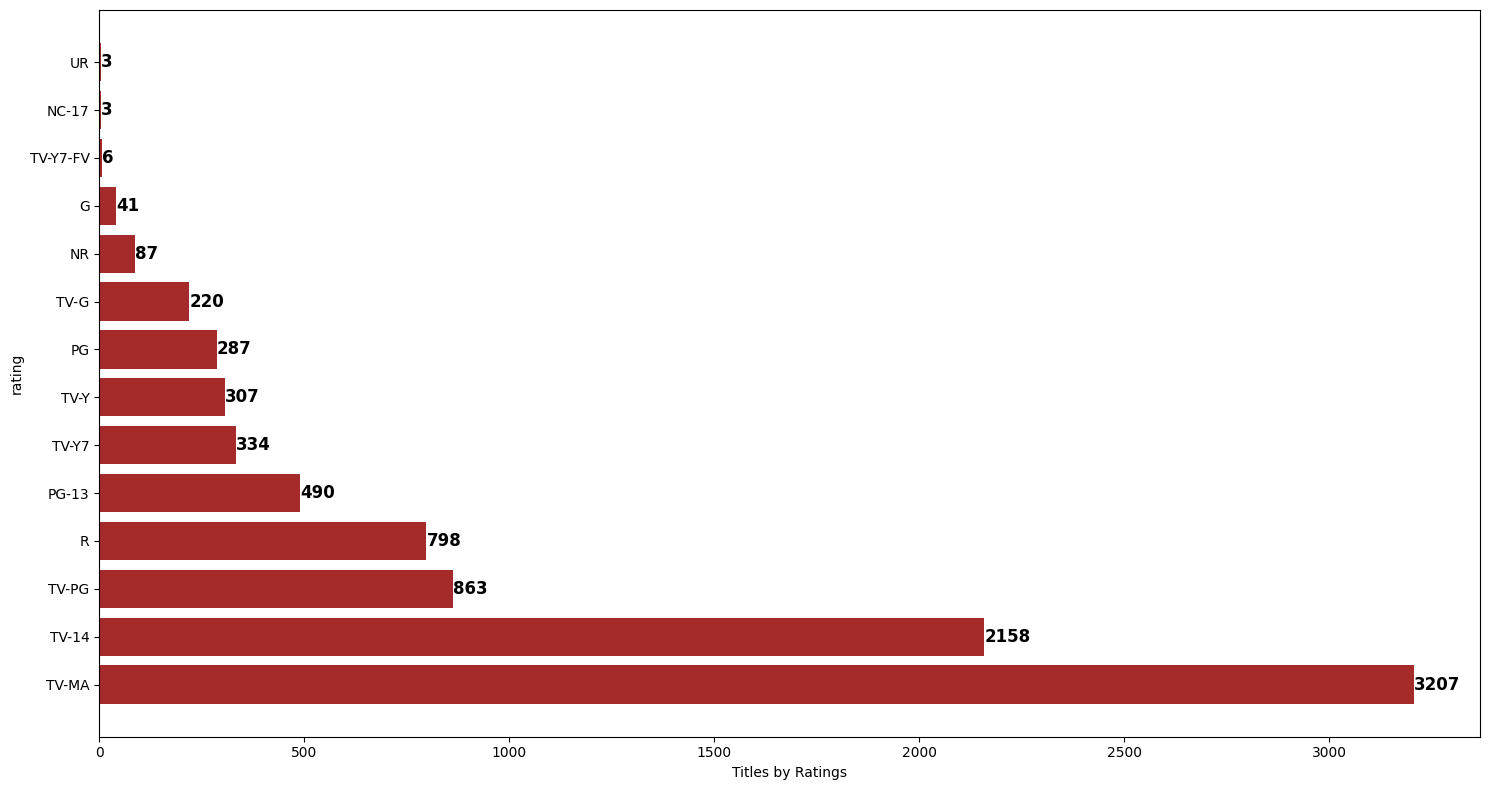

In [96]:
df1 = df.groupby('rating').agg({'title': 'nunique'}).sort_values(by='title', ascending=False).reset_index()
plt.figure(figsize=(15,8))
plt.barh(df1['rating'], df1['title'], color= "brown")
plt.xlabel('Titles by Ratings')
plt.ylabel('rating')

for index, value in enumerate(df1['title']):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()


In [97]:
movie_ratings = df.loc[df['type'] == 'Movie'].groupby('rating').agg({'title': 'nunique'}).reset_index()
shows_ratings = df.loc[df['type'] == 'TV Show'].groupby('rating').agg({'title': 'nunique'}).reset_index()

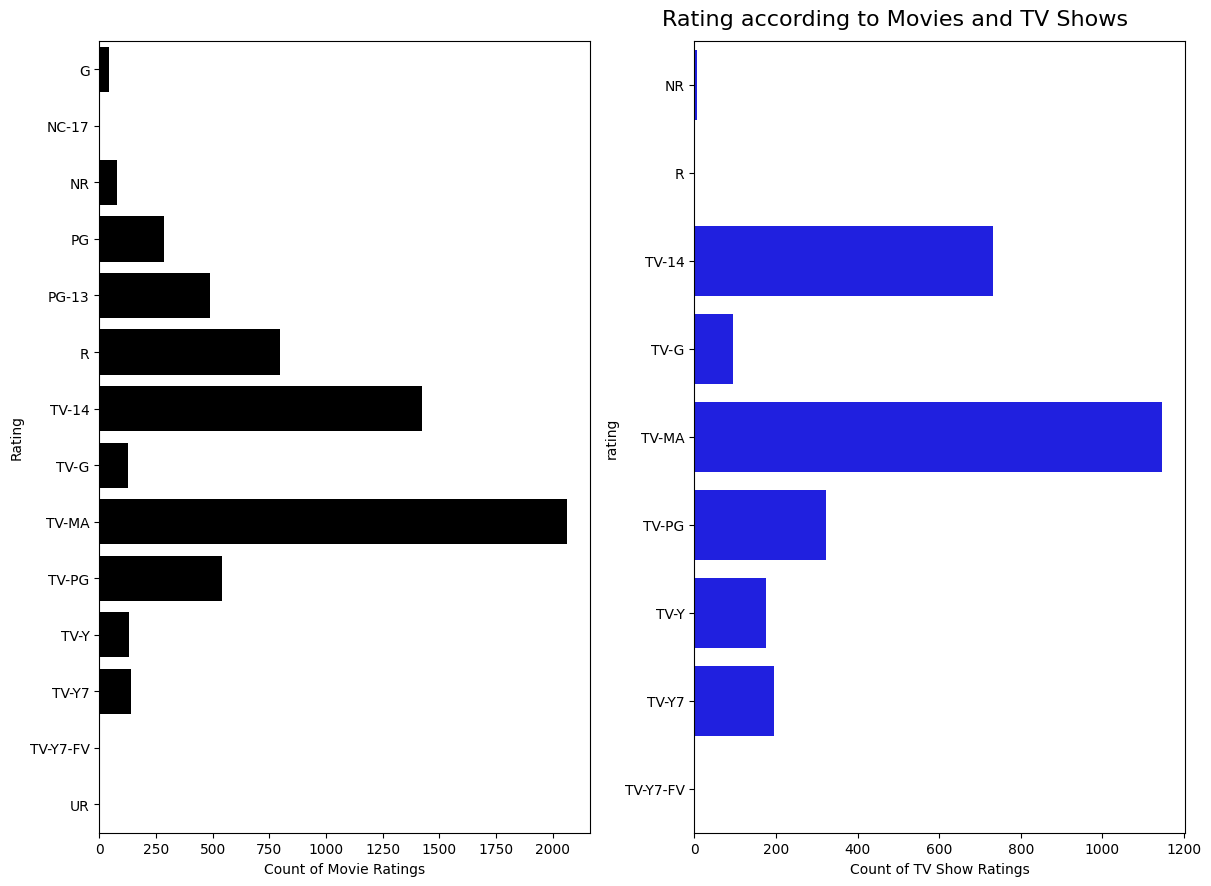

In [98]:
# Assuming you have the 'movie_ratings' and 'shows_ratings' DataFrames from your code
plt.figure(figsize=(18, 9))
plt.suptitle('Rating according to Movies and TV Shows', fontsize=16)
# Subplot 1: Movie Ratings
plt.subplot(1, 3, 1)
sns.barplot(data=movie_ratings, y='rating', x='title', color='black')
plt.xlabel('Count of Movie Ratings')
plt.ylabel('Rating')

# Subplot 2: TV Show Ratings
plt.subplot(1, 3, 2)
sns.barplot(data=shows_ratings, y='rating', x='title', color='blue')
plt.xlabel('Count of TV Show Ratings')

plt.tight_layout()
plt.show()


In [99]:
# number of distinct movie on the duration
df.groupby('duration').agg({'title': 'nunique'}).sort_values(by='title', ascending= False)

,title
duration,
80-100,2222
1 Season,1792
100-120,1672
120-150,895
50-80,808
2 Seasons,425
1-50,287
150-200,226
3 Seasons,199


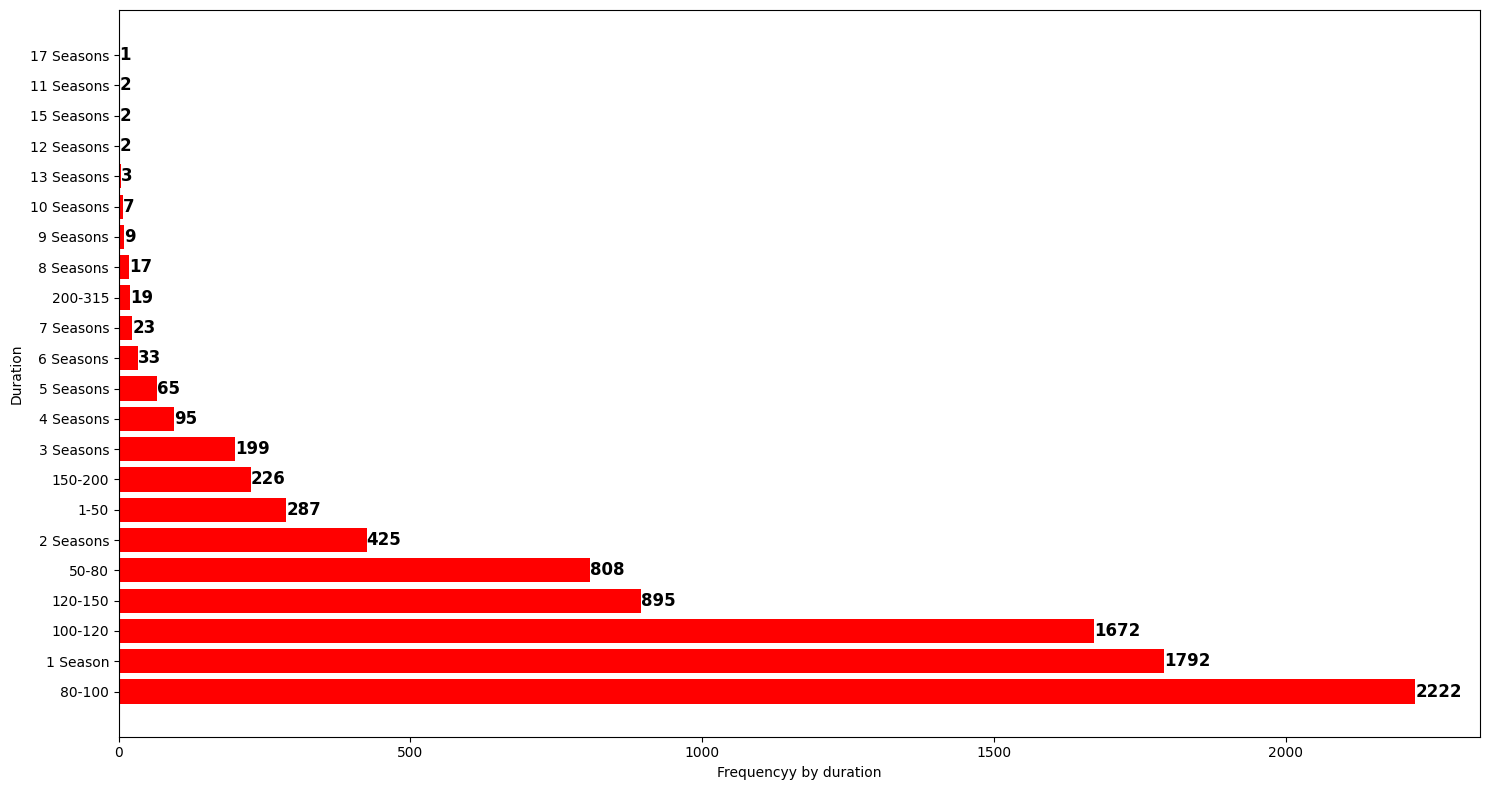

In [100]:
df1 = df.groupby('duration').agg({'title': 'nunique'}).sort_values(by='title', ascending= False).reset_index()
plt.figure(figsize=(15,8))
plt.barh(df1['duration'], df1['title'], color= "red")
plt.xlabel('Frequencyy by duration')
plt.ylabel('Duration')

for index, value in enumerate(df1['title']):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()


We can see most people watch movies which around 1 to 1:30 hour movie and  we can see the season 1 is most watched in the series

In [101]:
# number of distinct titles on the basix of actors 
df.groupby(['Actors']).agg({'title': 'nunique'})

,title
Actors,
"""Riley"" Lakdhar Dridi",1
'Najite Dede,2
2 Chainz,1
2Mex,1
4Minute,1
...,...
Åževket Ã‡oruh,1
Åžinasi Yurtsever,3
ÅžÃ¼kran OvalÄ±,1


In [102]:
# number of distinct titles on the basix of actors 
df_actor = df.groupby(['Actors']).agg({'title': 'nunique'}).reset_index().sort_values(by ='title', ascending = False).head(30)
# df_actors = df_actor.loc[df_actor['Actors'] != 'Unknown Actor']
df_actors  = df_actor.loc[df_actor['Actors'] != 'unknown Actors']

plt.figure(figsize=(15, 8))
plt.barh(df_actor['Actors'], df_actor['title'], color ='orange')
plt.xlabel('Number of movies')
plt.ylabel('Popular Actors')
plt.show()

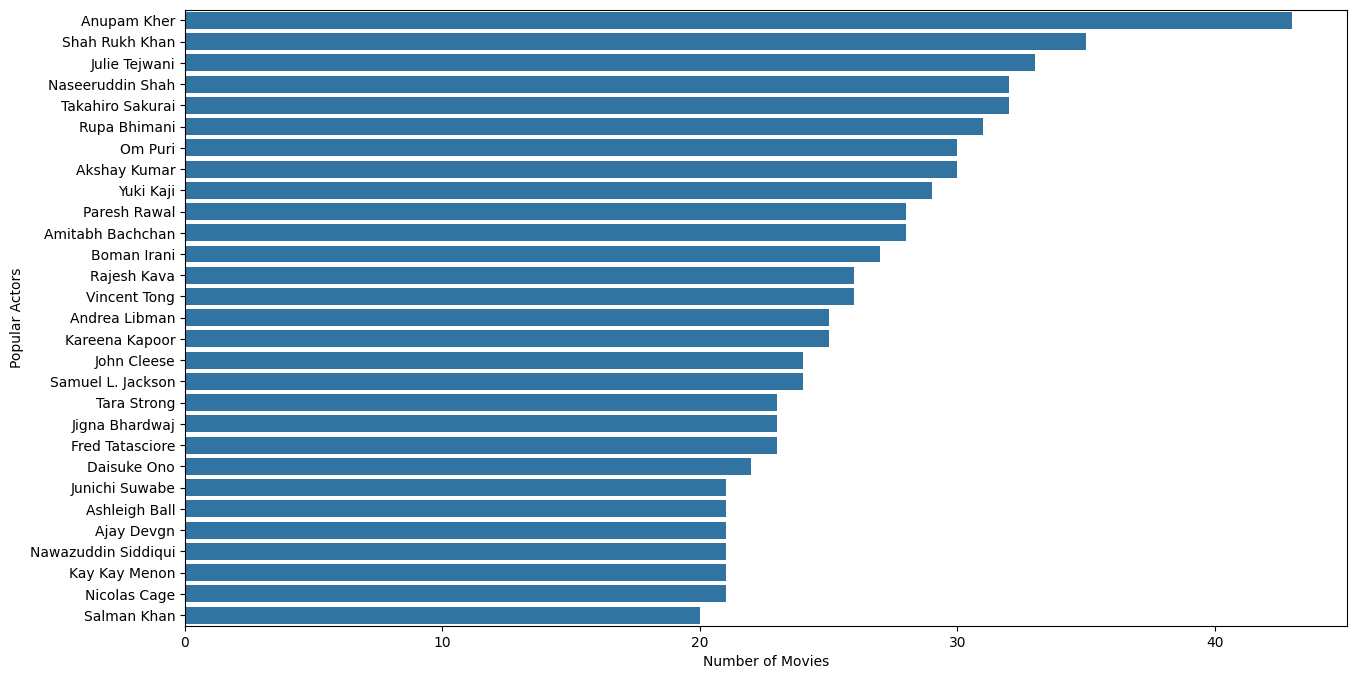

In [103]:
plt.figure(figsize=(15,8))
sns.barplot(y = df_actors['Actors'], x= df_actors['title'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

aumpum kher is the most casted actor in netflix movies 

In [104]:
# number of distinct title on the basis of actors
df.groupby('Directors').agg({'title': 'nunique'}).reset_index().sort_values(by ='title', ascending = False)

,Directors,title
4978,unknown director,2633
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,RaÃºl Campos,19
4457,Suhas Kadav,16
...,...,...
634,Bradley Walsh,1
2295,Juan Antin,1
2296,Juan Antonio de la Riva,1
2297,Juan Camilo Pinzon,1


In [105]:
# number of distinct title on the basis of actors
df_director = df.groupby('Directors').agg({'title': 'nunique'}).reset_index().sort_values(by ='title', ascending = False).head(30)
df_director = df_director.loc[df_director['Directors'] != 'unknown director']

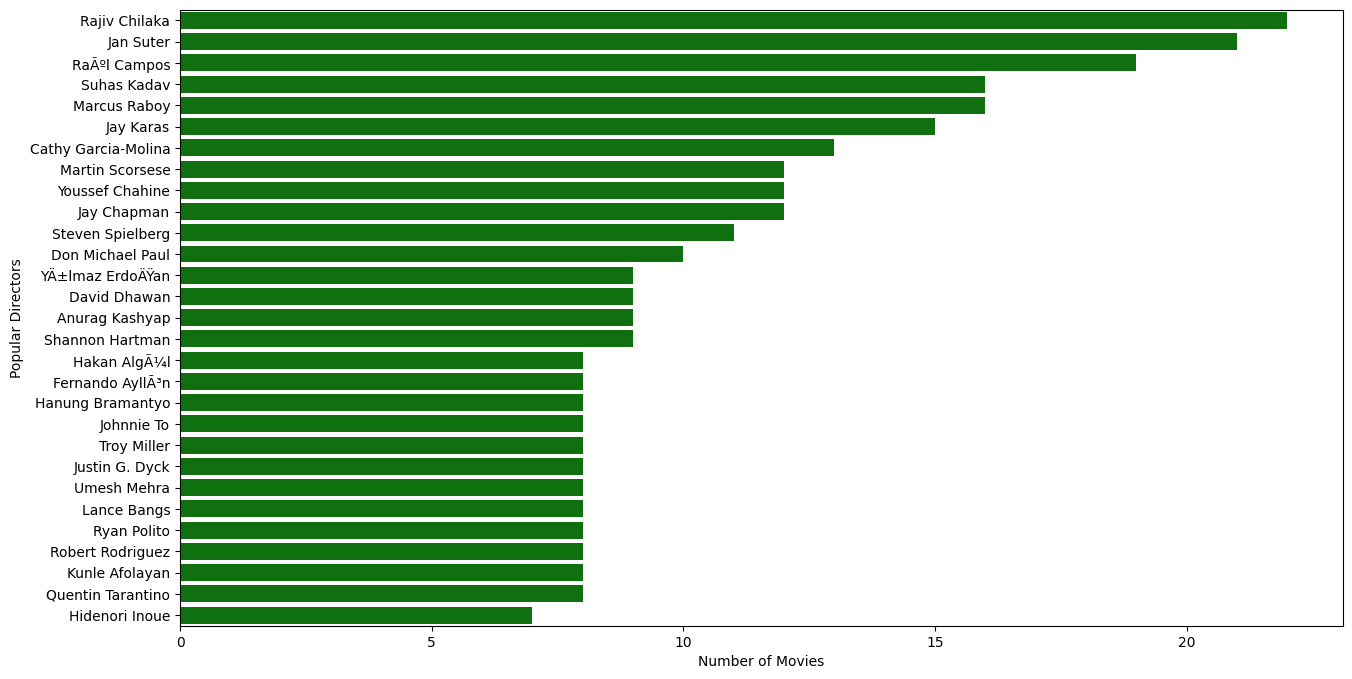

In [106]:
plt.figure(figsize=(15,8))
sns.barplot(y = df_director['Directors'], x= df_director['title'],color = 'green')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

<Axes: xlabel='year'>

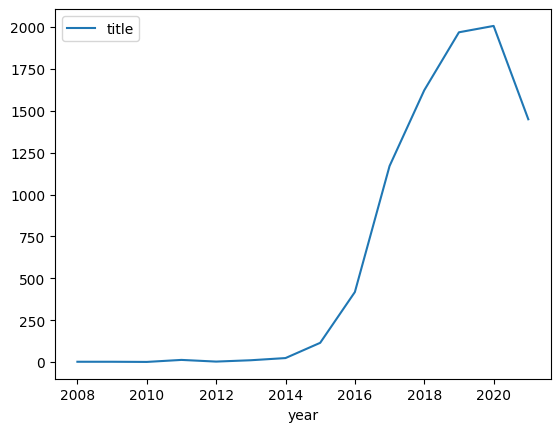

In [107]:
# year data 
df.groupby('year').agg({'title': 'nunique'}).plot()

In [108]:
df.groupby('year').agg({'title': 'nunique'})

,title
year,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,115
2016,418


The amount of content is increase from 2008 continously till 2019 . then started Decreasing from here 2018 ( reason - Maybe covid)

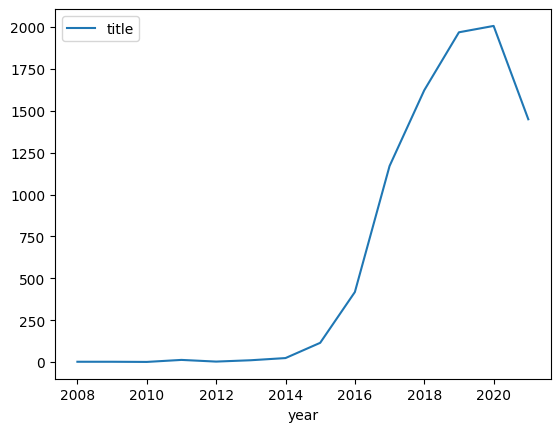

In [109]:
df.groupby('year').agg({'title': 'nunique'}).plot()
plt.show()

In [110]:
df.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,modified_date,month,week,year,quarter
0,Dick Johnson Is Dead,Kirsten Johnson,unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021,Q3
1,Blood & Water,unknown director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021,Q3
2,Blood & Water,unknown director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021,Q3
3,Blood & Water,unknown director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021,Q3
4,Blood & Water,unknown director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021,Q3


In [111]:
df.groupby('week').agg({'title': 'nunique'})[:10]

,title
week,
1,372
2,108
3,113
4,88
5,208
6,97
7,147
8,110
9,254


<Axes: xlabel='week'>

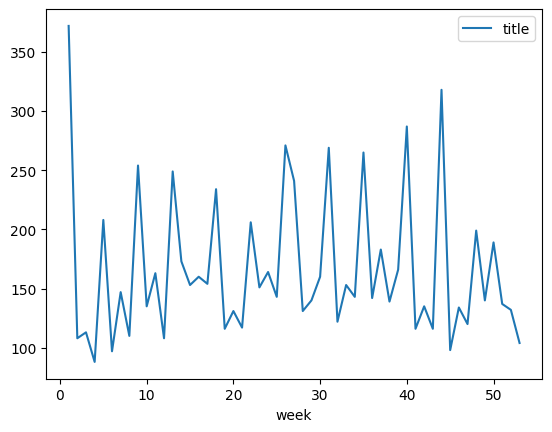

In [112]:
df.groupby('week').agg({'title': 'nunique'}).plot()

    Years first week most of the movies are watched so we can say movie watch 
    count in january is the highest watch time , so netflix should do more realse in january 


# Now we are using univariatie approch to solve 
### Tv Shows and Movies

In [113]:
df_shows  = df.loc[df['type'] == 'TV Show']
df_movies = df.loc[df['type'] == 'Movie']


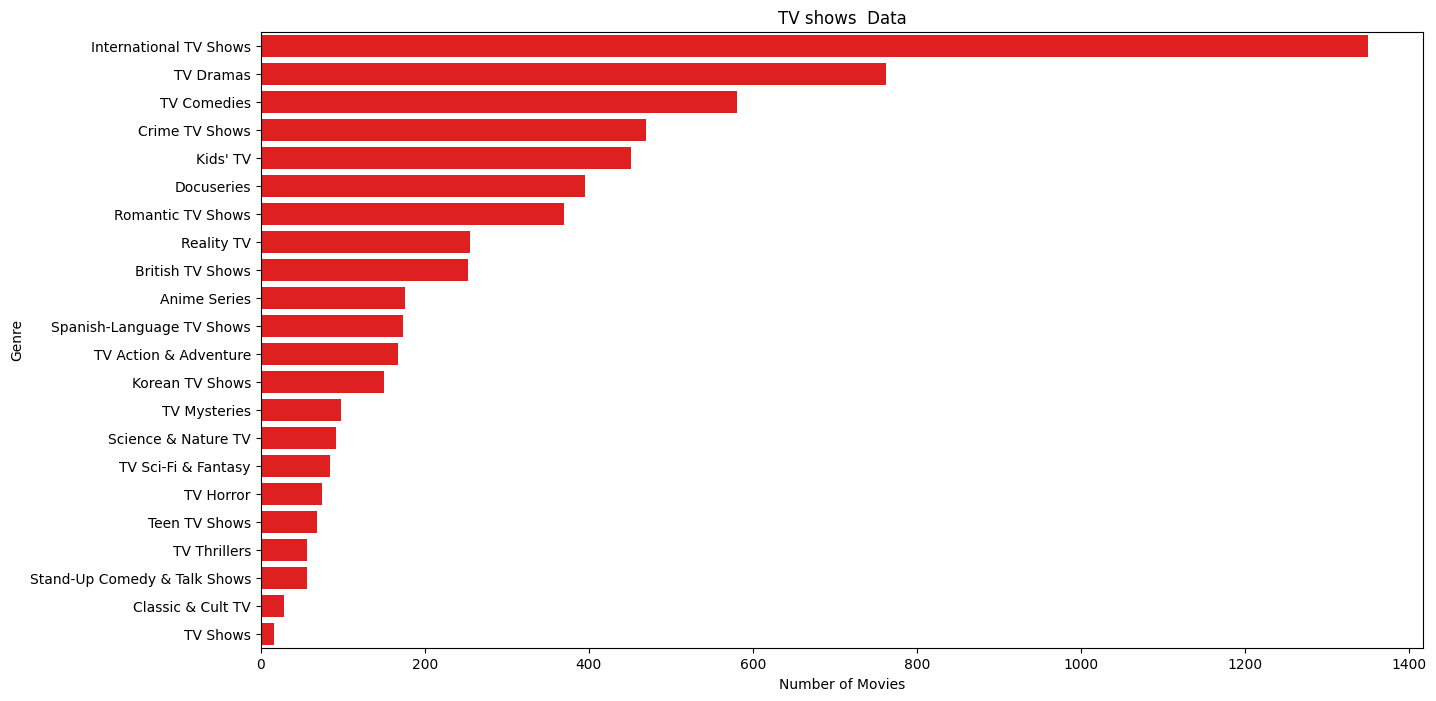

In [114]:
df_genre = df_shows.groupby('Genre').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending = False)
plt.figure(figsize=(15,8))
sns.barplot(y = df_genre['Genre'], x= df_genre['title'],color = 'red')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('TV shows  Data')
plt.show()

International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

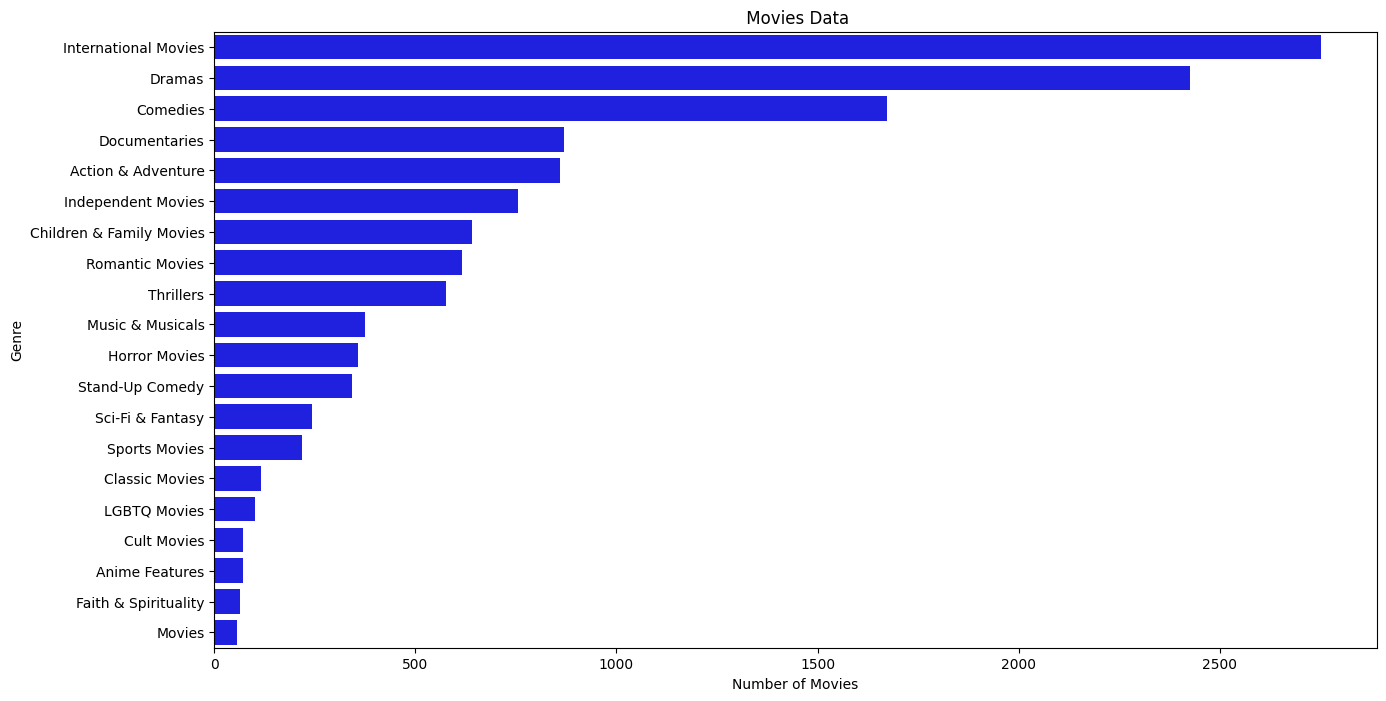

In [115]:
df_genre = df_movies.groupby('Genre').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending = False)
plt.figure(figsize=(15,8))
sns.barplot(y = df_genre['Genre'], x= df_genre['title'],color = 'blue')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title(' Movies Data')
plt.show()

International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on Netflix

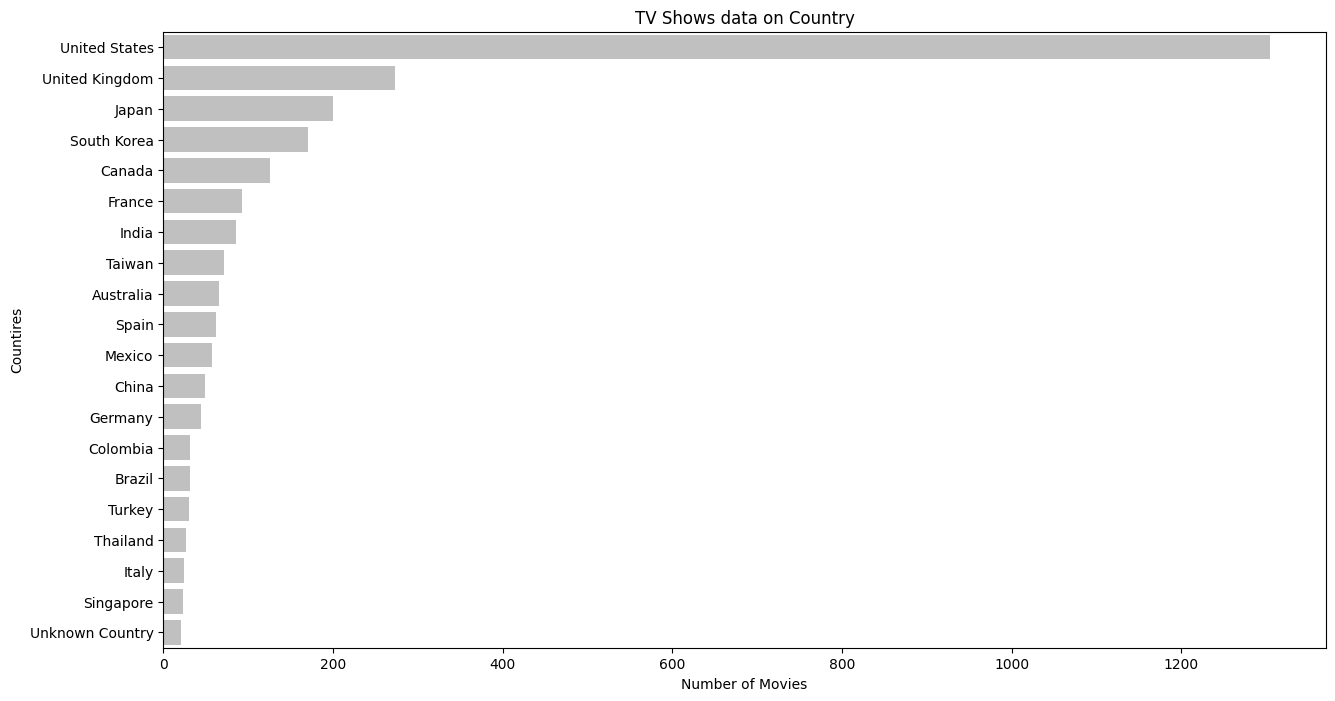

In [116]:
# checking on the country for the TV shows
df_countries_shows = df_shows.groupby('country').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False).head(20)
plt.figure(figsize=(15,8))
sns.barplot(y = df_countries_shows['country'], x= df_countries_shows['title'],color = 'silver')
plt.xlabel('Number of Movies')
plt.ylabel('Countires')
plt.title('TV Shows data on Country')
plt.show()

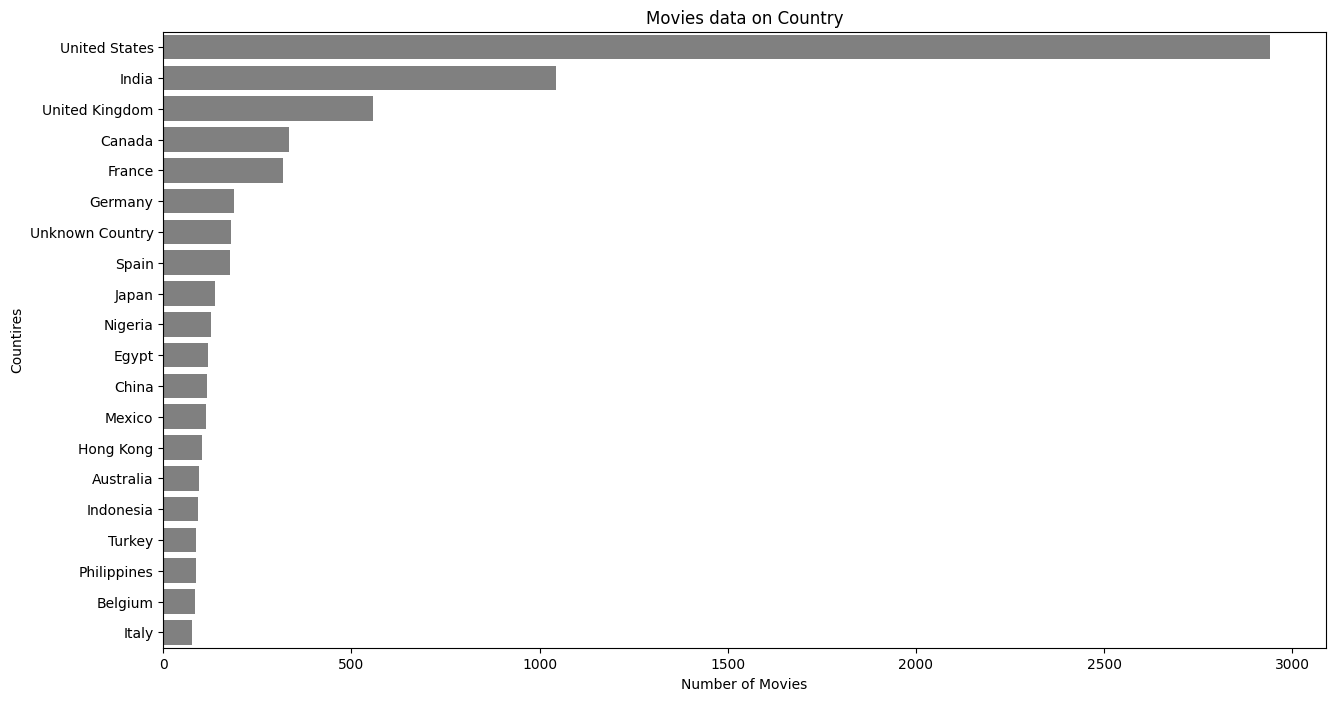

In [117]:
# checking on the country for the TV shows
df_countries_movies = df_movies.groupby('country').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False).head(20)
plt.figure(figsize=(15,8))
sns.barplot(y = df_countries_movies['country'], x= df_countries_movies['title'],color = 'grey')
plt.xlabel('Number of Movies')
plt.ylabel('Countires')
plt.title('Movies data on Country')
plt.show()

United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.

Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

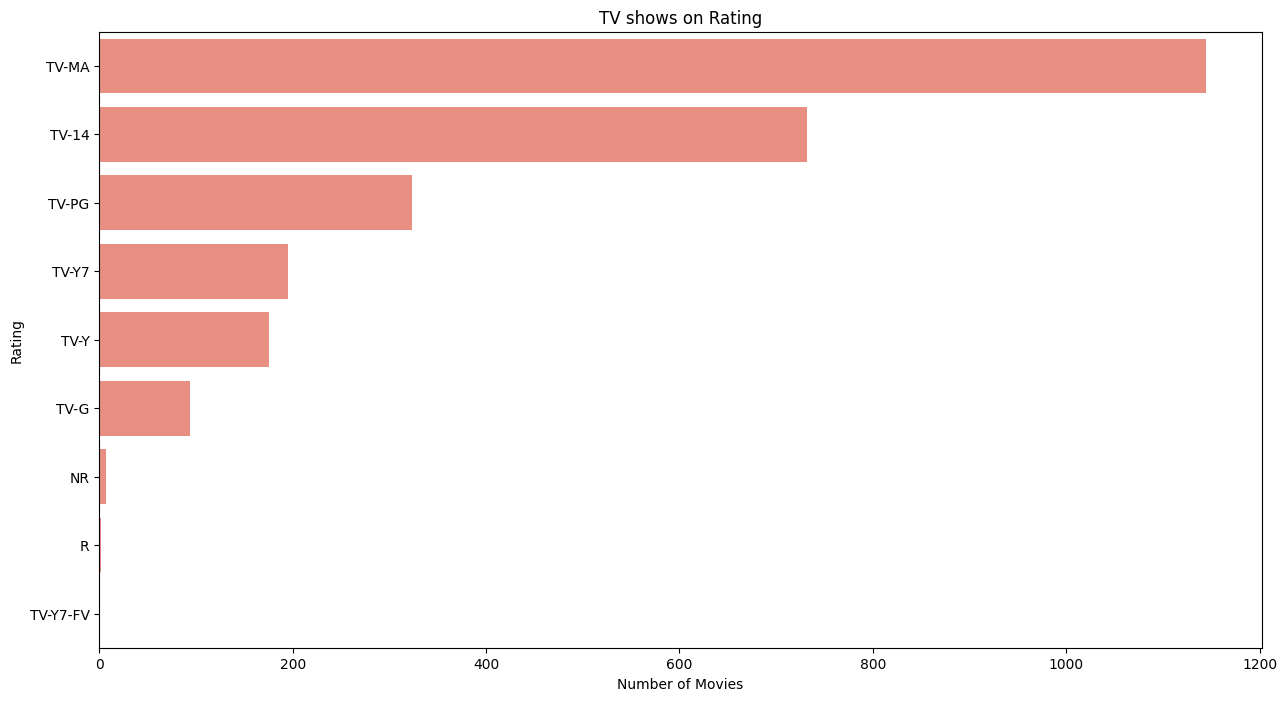

In [118]:
# rating on the Tv shows data 
df_rating_shows = df_shows.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)
plt.figure(figsize=(15,8))
sns.barplot(y = df_rating_shows['rating'], x= df_rating_shows['title'],color='salmon')
plt.xlabel('Number of Movies')
plt.ylabel('Rating')
plt.title('TV shows on Rating')
plt.show()

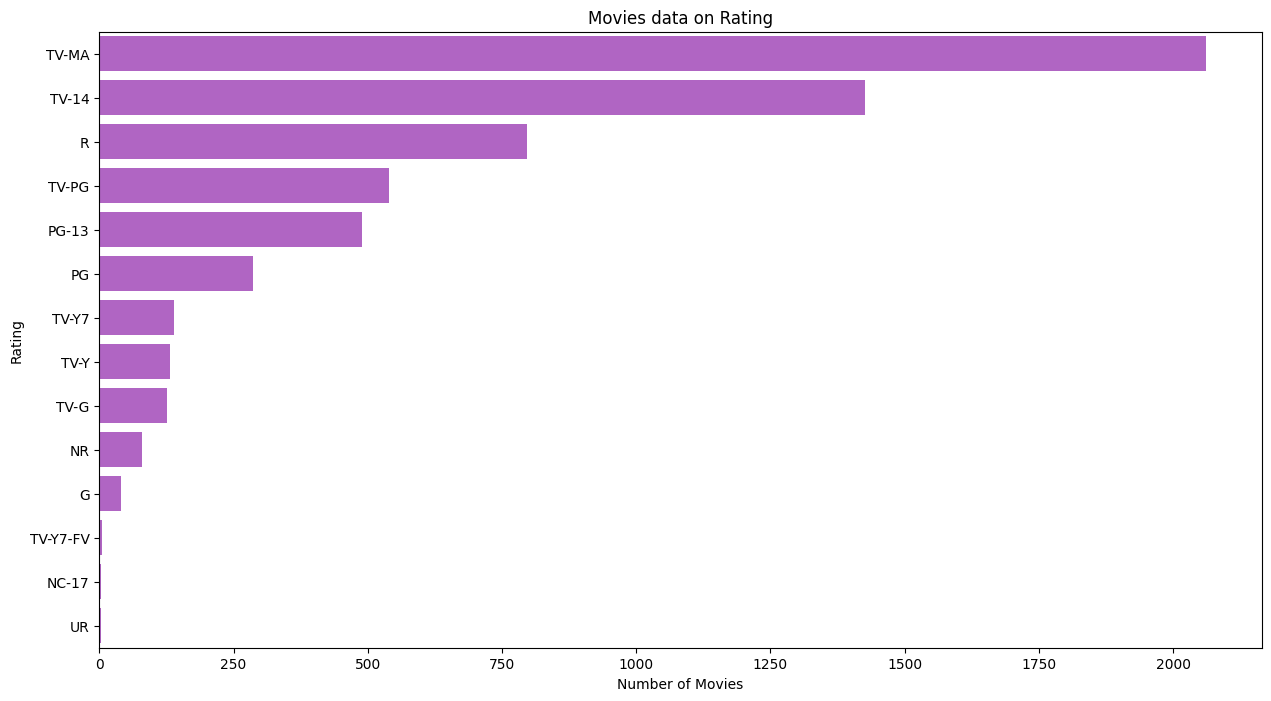

In [119]:
# rating on the movies shows data 
df_rating_movies = df_movies.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)
plt.figure(figsize=(15,8))
sns.barplot(y = df_rating_movies['rating'], x= df_rating_movies['title'],color='mediumorchid')
plt.xlabel('Number of Movies')
plt.ylabel('Rating')
plt.title('Movies data on Rating')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages.

Moreover there are no TV Shows having a rating of R

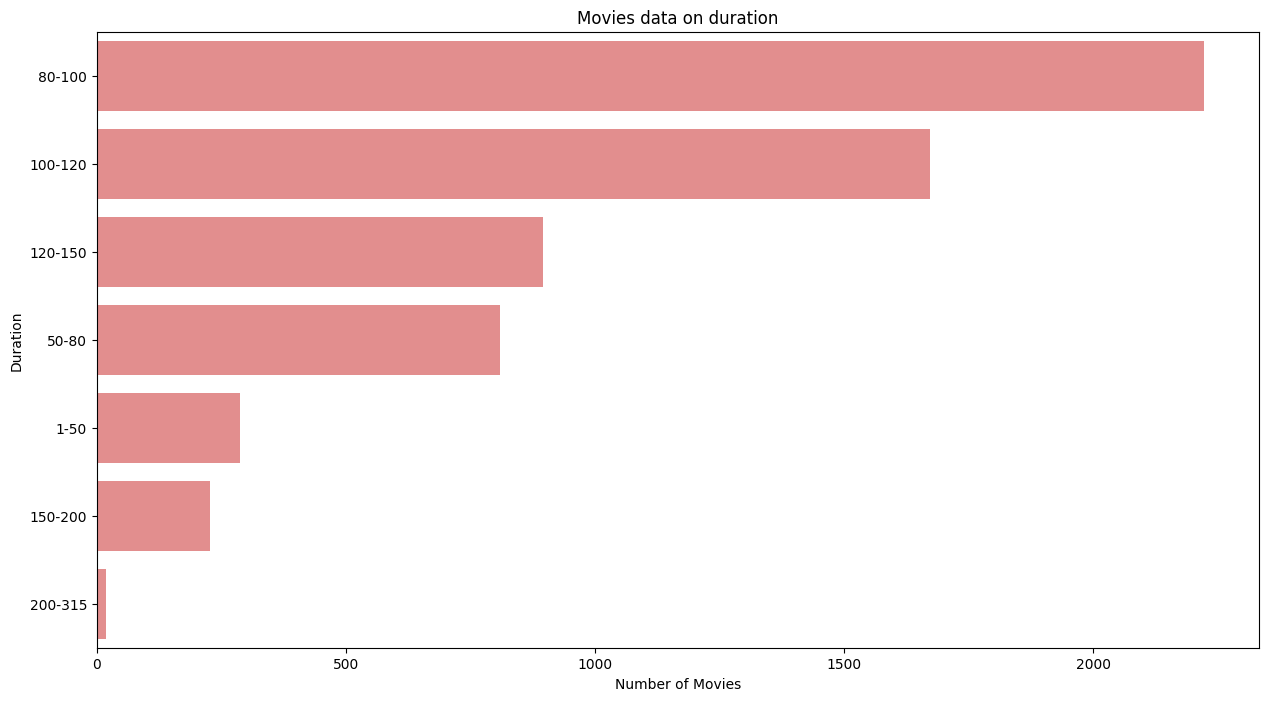

In [120]:
# Duration on the movies shows data 
df_duration_movies = df_movies.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)
plt.figure(figsize=(15,8))
sns.barplot(y = df_duration_movies['duration'], x= df_duration_movies['title'],color='lightcoral')
plt.xlabel('Number of Movies')
plt.ylabel('Duration')
plt.title('Movies data on duration')
plt.show()

Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie. So quite possibly 80-150 mins is the sweet spot we would be wanting for movies.

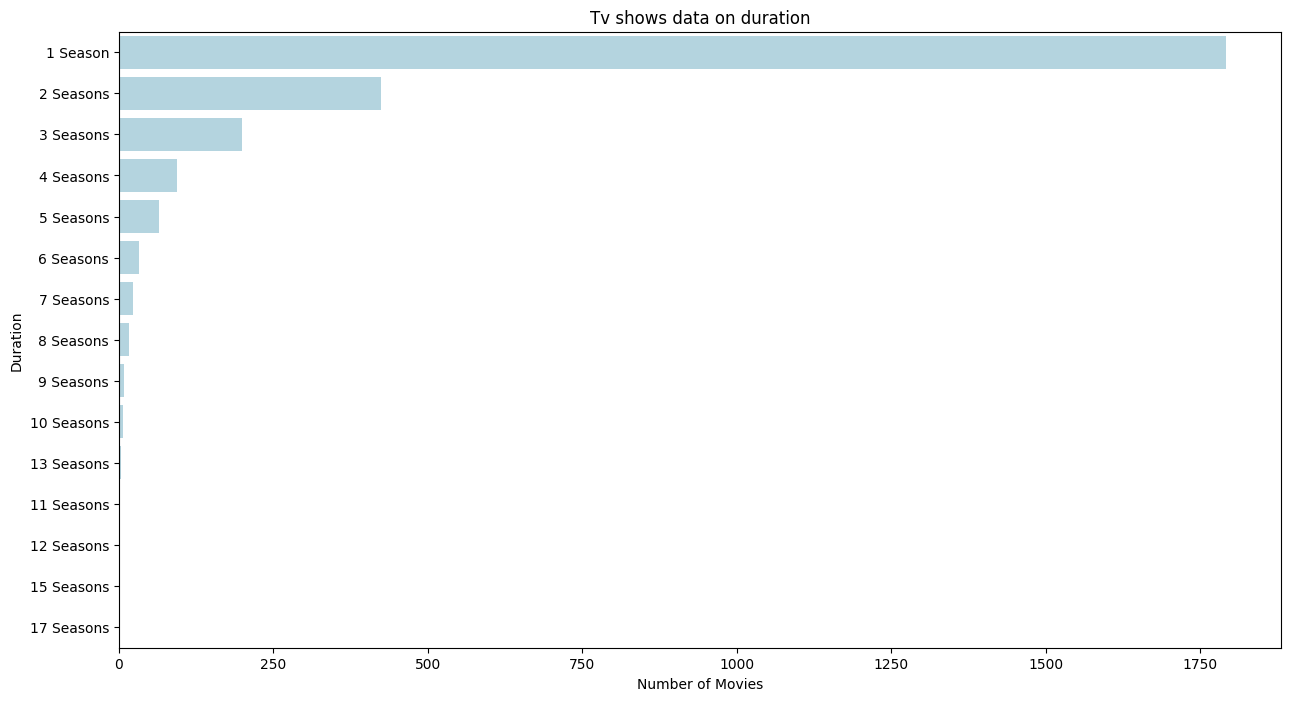

In [121]:
# Duration on the TV Shows data 
df_duration_tvshows = df_shows.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)
plt.figure(figsize=(15,8))
sns.barplot(y = df_duration_tvshows['duration'], x= df_duration_tvshows['title'],color='lightblue')
plt.xlabel('Number of Movies')
plt.ylabel('Duration')
plt.title('Tv shows data on duration')
plt.show()

Across TV Shows, shows having only 1 Season are common as soon as the season length increases, the number of shows decrease and this definitely sounds as expected

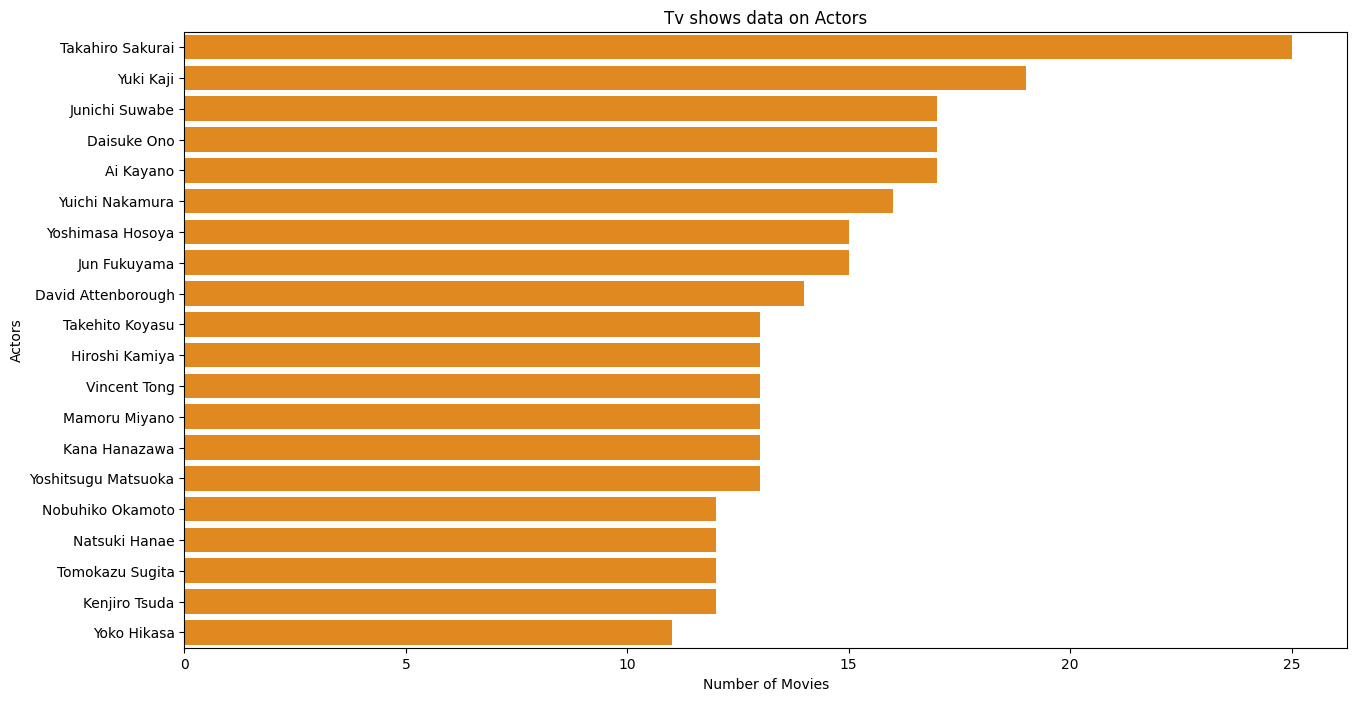

In [122]:
# # Actors on the TV Shows data 
df_Actors_tvshows = df_shows.groupby('Actors').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)
plt.figure(figsize=(15,8))
df_Actors_tvshows = df_Actors_tvshows.loc[df_Actors_tvshows['Actors']!= 'unknown Actors'].head(20)
sns.barplot(y = df_Actors_tvshows['Actors'], x= df_Actors_tvshows['title'],color='darkorange')
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.title('Tv shows data on Actors')
plt.show()

Takahiro Sakurai,Yuki Kaji and other South Korean/Japanese actors are the most popular actors across TV Shows

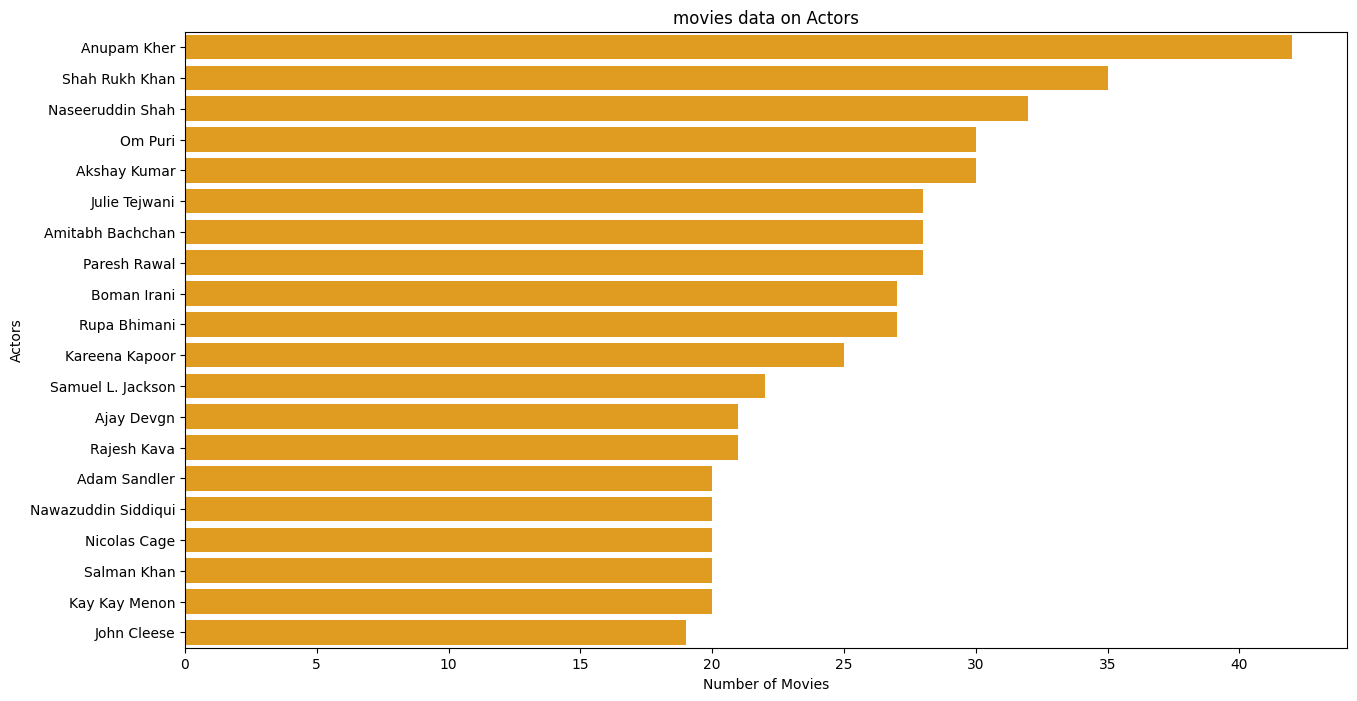

In [123]:
# Actors on the movies data 
df_Actors_movies = df_movies.groupby('Actors').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)
plt.figure(figsize=(15,8))
df_Actors_movies = df_Actors_movies.loc[df_Actors_movies['Actors']!= 'unknown Actors'].head(20)
sns.barplot(y = df_Actors_movies['Actors'], x= df_Actors_movies['title'],color='orange')
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.title('movies data on Actors')
plt.show()

Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular acrossmovies on Netflix

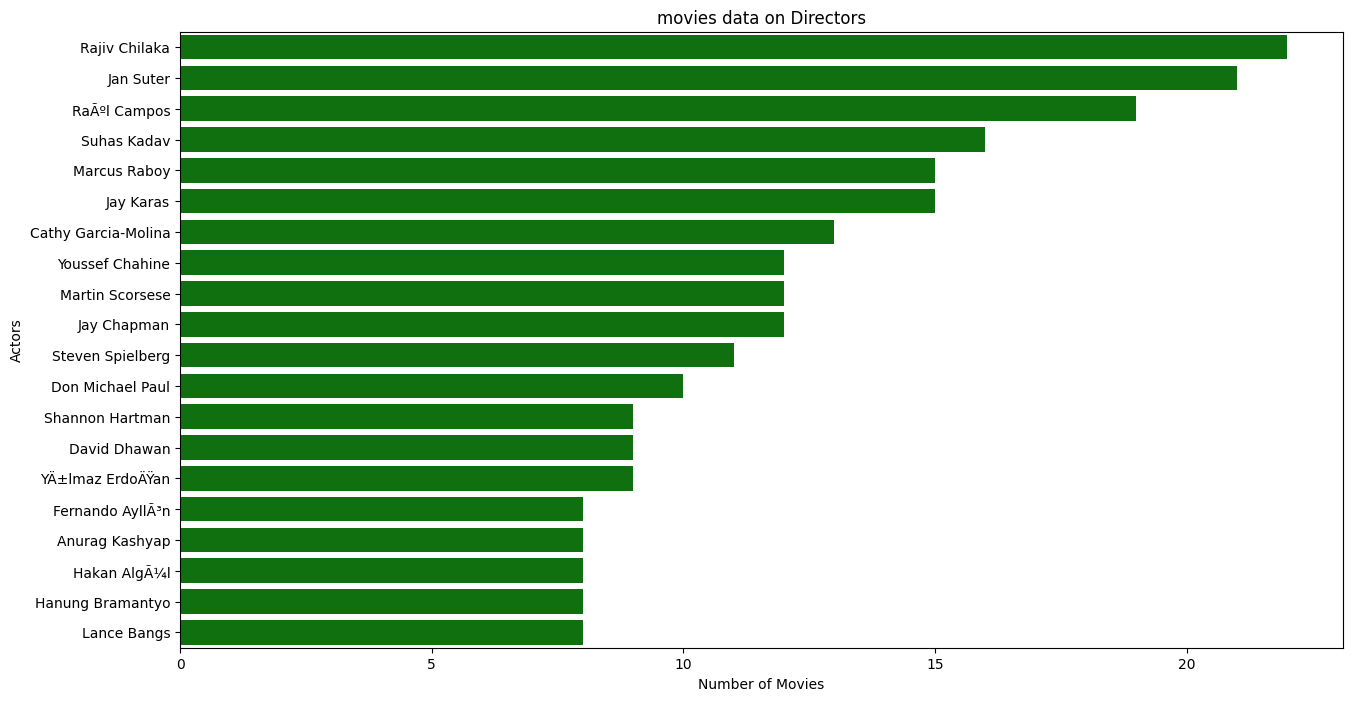

In [124]:
# Director on the movies data 
df_Directors_movies = df_movies.groupby('Directors').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)
plt.figure(figsize=(15,8))
df_Directors_movies = df_Directors_movies.loc[df_Directors_movies['Directors']!= 'unknown director'].head(20)
sns.barplot(y = df_Directors_movies['Directors'], x= df_Directors_movies['title'],color='green')
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.title('movies data on Directors')
plt.show()

Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

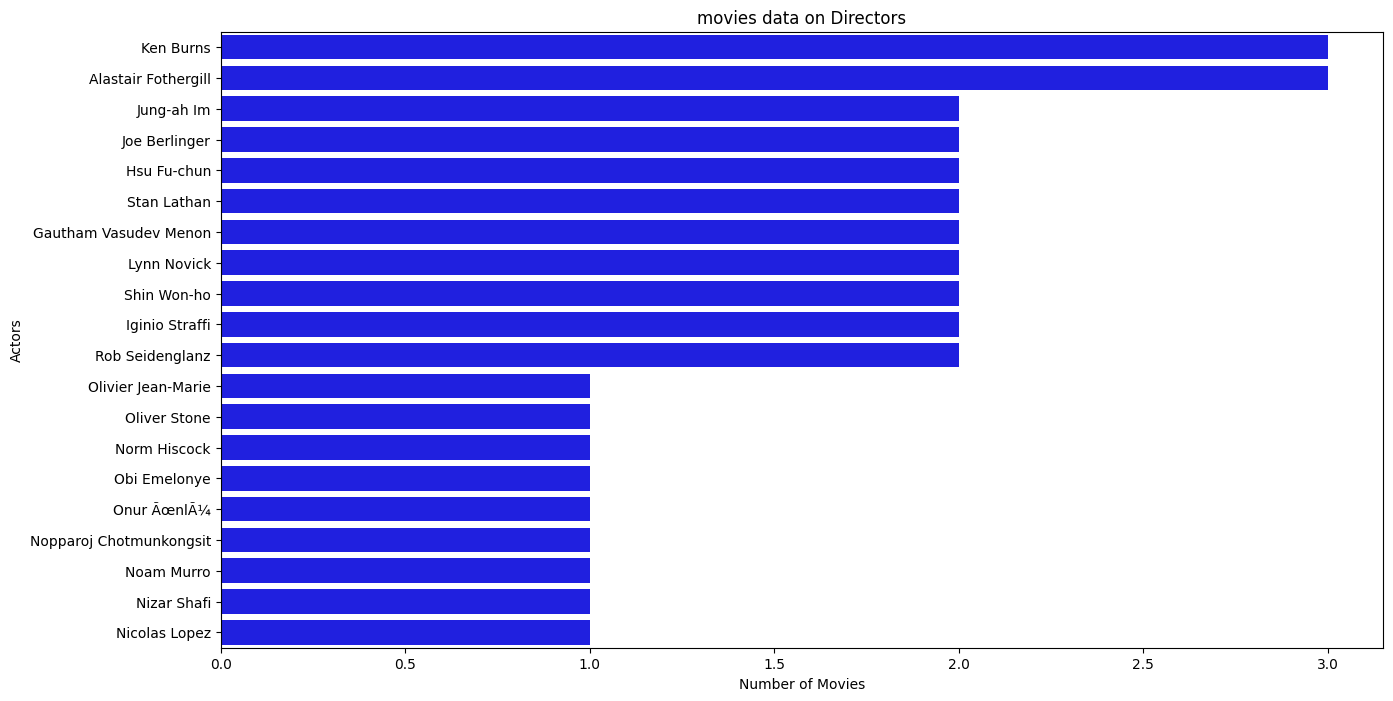

In [125]:
# Director on the movies data 
df_Directors_shows = df_shows.groupby('Directors').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)
plt.figure(figsize=(15,8))
df_Directors_shows = df_Directors_shows.loc[df_Directors_shows['Directors']!= 'unknown director'].head(20)
sns.barplot(y = df_Directors_shows['Directors'], x= df_Directors_shows['title'],color='blue')
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.title('movies data on Directors')
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

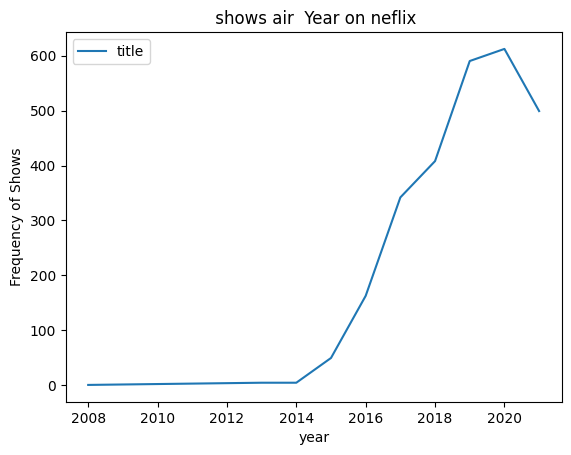

In [126]:
# which year on shows  are added to netflix 
df_shows.groupby('year').agg({'title':'nunique'}).plot()
plt.ylabel("Frequency of Shows")
plt.title(' shows air  Year on neflix')
plt.show()

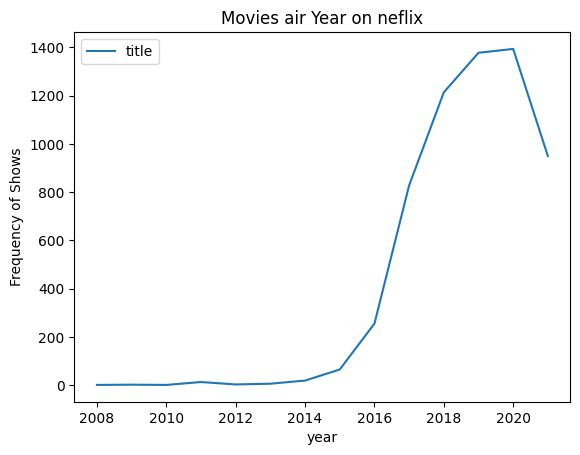

In [127]:
# which year on shows  are added to netflix 
df_movies.groupby('year').agg({'title':'nunique'}).plot()
plt.ylabel("Frequency of Shows")
plt.title('Movies air Year on neflix')
plt.show()

Actual Releases of both TV Shows and Movies have taken a hit after 2020

In [128]:
df.head(1)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,modified_date,month,week,year,quarter
0,Dick Johnson Is Dead,Kirsten Johnson,unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021,Q3


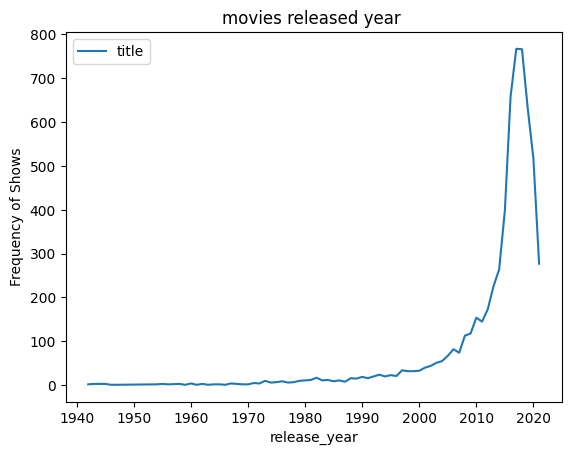

In [129]:
# which released year  on movie are added to netflix 
df_movies.groupby('release_year').agg({'title':'nunique'}).plot()
plt.ylabel("Frequency of Shows")
plt.title('movies released year ')
plt.show()

We can see that Netflix has added movies released between 1940 and 2020, and most of the movies on Netflix are from the years 2010 to 2020.

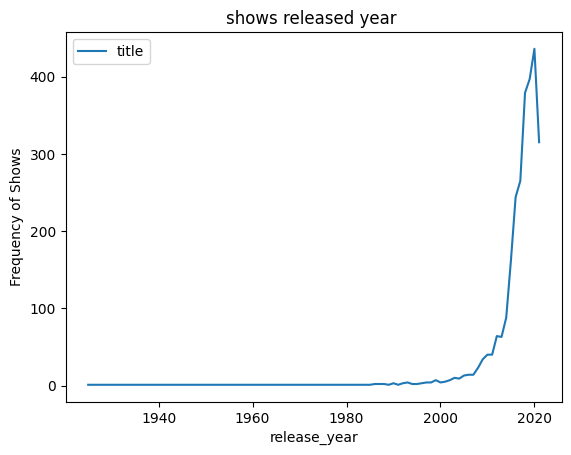

In [130]:
# which released year  on shows are added to netflix 
df_shows.groupby('release_year').agg({'title':'nunique'}).plot()
plt.ylabel("Frequency of Shows")
plt.title('shows released year ')
plt.show()

We can see that Netflix has added shows released between 1940 and 2020, and most of the shows on Netflix are from the years 2018 to 2020

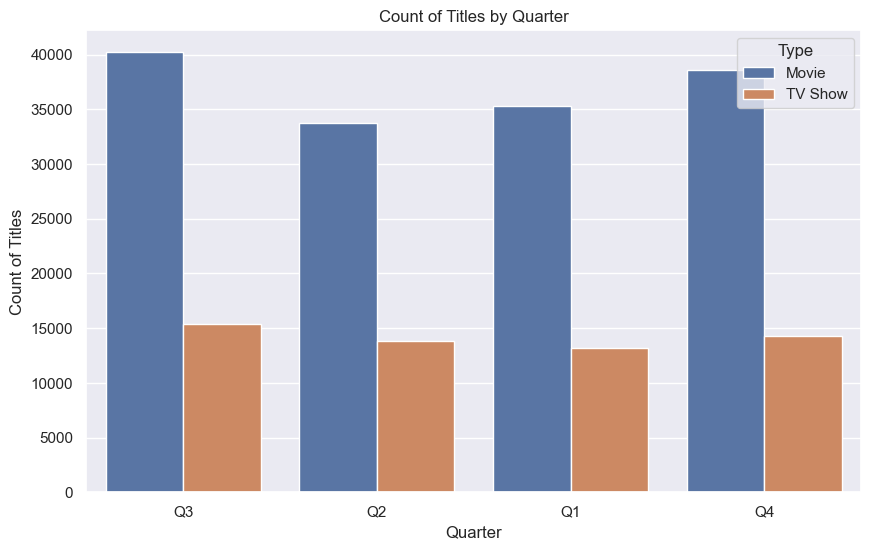

In [143]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='quarter', hue='type')
plt.xlabel('Quarter')
plt.ylabel('Count of Titles')
plt.title('Count of Titles by Quarter')
plt.legend(title='Type')
plt.show()

we can see the movies and show frequecy by quater wise , and Q3 has most of movies and shows 

# Recommendations 

1) The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so content aligning to that is recommended.

2) While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended

3) 80-120 mins is the recommended length for movies

4) Add TV Shows in July/August and Movies in last week of the year/first month of the next year.

5) The target audience in USA and India is recommended to be 14+ and above ratings while for UK, its recommended to be completely Mature/R content .

6) Add movies for Indian Audience, it has been declining since 2018.

7) Anime Genre for Japan and Romantic Genre in TV Shows for South Korean audiences is recommended.